In [6]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

def sigmoid(W: list, X: list, b: float):
    '''
    Sigmoid function for a single set of data
    
    Parameters:
        W: a list of weights
        X: a list of input variables
        b: a single number
    
    Returns:
        Sigmoid func f(z) where z = W * X + b
    '''
    z = np.dot(W, X) + b
    return 1 / (1  + np.exp(-z))

def derivatives(X: np.ndarray, Y: list, W: list, b: float) -> tuple[list, float]:
    '''
    Calculates the Cost Function (J) derivatives by W and B variables
    dJ/dW = 1/m * SUM((f(x_i) - y_i) * x_i), where i = [1, m] and iterates over the learning dataset
    dJ/db = 1/m * SUM(f(x_i) - y_i)
    
    Parameters:
        X: 2d array that contains a list of input variables X for every data entry
        Y: a list of target variables, one for every data entry
        W: a list of weights W, these values will apply to all data entries
        b: a value of weight b, this value will apply to all data entries
        
    Returns:
        dJ/dW, dJ/db: where first is a list of values, since W is a list; second is a single value
    '''

    # TODO: I'm using an NDArray size method, but I'd like Y to be a more generic list, can we use list len() method here?
    m = Y.size #number of training set examples
    sum_db = 0 # dJ/db is a single value
    sum_dw = np.zeros(X.shape[1]) # dJ/dW is a list of values, depends on the number of variables x
    
    for i in range(m):
        x: list = X[i] # Take the set of variables for the i-th training example
        y: float = Y[i] # Take the i-th output
        f = sigmoid(W, x, b) # Calculate prediction for given W, x and b
        prediction_error = (f - y)
        sum_db = sum_db + prediction_error
        sum_dw = sum_dw + prediction_error * x
    
    return sum_dw / m, sum_db / m

def run_descent(X: np.ndarray, Y: list, W0: list, b0: float) -> tuple[list, float]:
    '''
    Run gradient descent for a given training dataset of X, Y and staring model weights W0 and b0
    
    Parameters:
        X: training dataset variables, a list of lists
        Y: training dataset targets, a list
        W0: a list of initial weights W, the length corresponds to a number of variables x
        b0: initial value for a weight b
        
    Returns:
        W, b: weights for a prediction model function
    '''
    W = W0
    b = b0
    alpha = 0.001
    steps = 1 * 10 ** 5

    for _ in range(steps):
        dJ_dW, dJ_db = derivatives(X, Y, W, b)
        W = W - alpha * dJ_dW
        b = b - alpha * dJ_db

    return W, b



The dataset has 2 x variables
The dataset has total amount of 100 samples


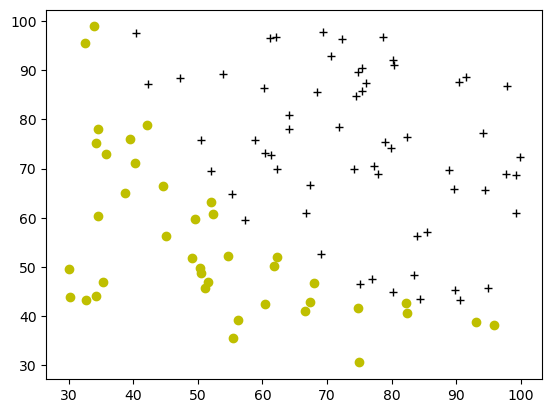

In [9]:

X, y = load_data("data/ex2data1.txt")

# Let's take a look at the data
print(f'The dataset has {X.shape[1]} x variables')
print(f'The dataset has total amount of {X.shape[0]} samples')

plot_data(X, y[:], pos_label="Admitted", neg_label="Not admitted")

Model weights are [[0.04180126 0.0345514 ]] for W and -4.349077199033892 for b
known vs predicted: 0.0 | 0
known vs predicted: 0.0 | 0
known vs predicted: 0.0 | 0
known vs predicted: 1.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 0.0 | 0
known vs predicted: 1.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 0.0 | 1
known vs predicted: 0.0 | 0
known vs predicted: 1.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 0.0 | 0
known vs predicted: 1.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 0.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 0.0 | 0
known vs predicted: 1.0 | 1
known vs predicted: 0.0 | 0
known vs predicted: 0.0 | 0
known vs predicted: 1.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 0.0 | 1
known vs predicted: 0.0 | 0
known vs predicted: 0.0 | 0
known vs predicted: 1.0 | 1
known vs predicted: 1.0 | 1
known vs predicted: 0.0 |

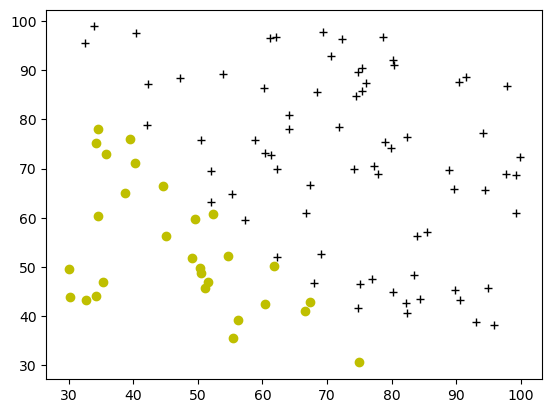

In [10]:
W0 = [1, 1] # Initial values for weights w, there are 2 values because we have 2 variables X in the dataset
b0 = 1

# Getting weights for our prediction model
# To get the model prediction we can run sigmoid() function 
# Plus we need to define the threshold - whether the model result considered to be 0 or 1
W, b = run_descent(X, y, W0, b0)

print(f'Model weights are [{W}] for W and {b} for b')


# Let's feed the training data to the model and see results
training_set_size = X.shape[0]
predictions = np.zeros(training_set_size)
threshold = 0.5

for i in range(training_set_size):
    sig = sigmoid(W, X[i], b)
    prediction = 1 if sig > threshold else 0
    predictions[i] = prediction
    print(f'known vs predicted: {y[i]} | {prediction}')


plot_data(X, predictions[:], pos_label="Admitted", neg_label="Not admitted")